In [1]:
from aprile.model import *
from torch_geometric.data import Data
from aprile.utils import sparse_id

# load data from file
gdata = AprileQuery.load_from_pkl('gdata_dict.pkl')
# convert data type to PyG Data
gdata = Data.from_dict(gdata)

# add proteins' features to data
gdata.p_feat = sparse_id(gdata.n_prot)

aprile = Aprile(gdata, device='cuda')


from aprile.model import *
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os

go-basic.obo: fmt(1.2) rel(2021-10-26) 47,197 GO Terms
  EXISTS: gene2go
HMS:0:00:04.214866 331,423 annotations, 20,689 genes, 18,627 GOs, 1 taxids READ: gene2go 

Load BP Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 80% 16,811 of 20,913 population items found in association

Load CC Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 86% 17,913 of 20,913 population items found in association

Load MF Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 83% 17,432 of 20,913 population items found in association


In [2]:
# basedir = 'out/CTD'
# files = os.listdir(basedir)
# print(len(files))

### Alzheimer's
- not included as a side effect
- drugs whose indication is Alzheimer's: 
    - not in sider
    - drugbank?

In [3]:
df_db = pd.read_csv('drugbank.tsv', sep='\t')

In [4]:
df_db.description.fillna('', inplace=True)
df_db.categories.fillna('', inplace=True)

In [5]:
df_db[df_db.description.str.contains('lzheimer')].shape

(32, 9)

In [6]:
from torch_geometric.data import Data

# load data from file
gdata = AprileQuery.load_from_pkl('gdata_dict.pkl')
# convert data type  to PyG Data
gdata = Data.from_dict(gdata)

In [7]:
### Alzheimer's not a side effect
for k,v in gdata.side_effect_name_to_idx.items():
    if 'lzheimer' in k:
        print(k,v)

ses = [k.lower() for k in gdata.side_effect_name_to_idx.keys()]

In [8]:
df_indication = pd.read_csv('meddra_all_indications.tsv', sep='\t',
                           names=['CID','ID','method','concept',
                                  'concept_type','concept_id','concept_name'])

In [9]:
### Alzheimer's drugs in SIDER but these aren't in Pose
df_indication[df_indication.concept_name.str.contains('lzheimer')].shape

(16, 7)

In [10]:
pose_cids = list(gdata.drug_id_to_idx.keys())

In [11]:
df_indication.head()

,CID,ID,method,concept,concept_type,concept_id,concept_name
0,CID100000085,C0015544,text_mention,Failure to Thrive,LLT,C0015544,Failure to thrive
1,CID100000085,C0015544,text_mention,Failure to Thrive,PT,C0015544,Failure to thrive
2,CID100000085,C0020615,text_mention,Hypoglycemia,LLT,C0020615,Hypoglycaemia
3,CID100000085,C0020615,text_mention,Hypoglycemia,PT,C0020615,Hypoglycaemia
4,CID100000085,C0022661,NLP_indication,"Kidney Failure, Chronic",LLT,C0022661,Renal failure chronic


In [12]:
df_indication[df_indication.CID.isin(pose_cids)]

,CID,ID,method,concept,concept_type,concept_id,concept_name


In [13]:
drug_names = list(gdata.drug_idx_to_name.values())
drug_names = [d.lower() for d in drug_names]

In [14]:
df_db_alz = df_db[df_db.description.str.contains('lzheimer')]
df_db_alz.shape

(32, 9)

In [15]:
df_db_dementia = df_db[df_db.description.str.lower().str.contains('dement')]
df_db_dementia.shape

(12, 9)

In [16]:
df_drugs_alz = df_db_alz[df_db_alz.name.str.lower().isin(drug_names)]
print('Alzheimer in description:', df_drugs_alz.shape[0])
df_drugs_alz.iloc[1].description

Alzheimer in description: 2


"Memantine is an amantadine derivative with low to moderate-affinity for NMDA receptors. It is a noncompetitive NMDA receptor antagonist that binds preferentially to NMDA receptor-operated cation channels. It  blocks the effects of excessive levels of glutamate that may lead to neuronal dysfunction. It is under investigation for the treatment of Alzheimer's disease, but there has been no clinical support for the prevention or slowing of disease progression."

In [17]:
df_drugs_dementia = df_db_dementia[df_db_dementia.name.str.lower().isin(drug_names)]
print('Dementia in description:', df_drugs_dementia.shape[0])
df_drugs_dementia.iloc[0].description

Dementia in description: 3


'Citalopram hydrobromide belongs to a class of antidepressant agents known as selective serotonin-reuptake inhibitors (SSRIs). Citalopram and its N-demethylated metabolites exist as a racemic mixture but its effects are largely due to the S-enantiomer, S-citalopram and S-demthylcitalopram. Despite distinct structural differences between compounds in this class, SSRIs possess similar pharmacological activity. As with other antidepressant agents, several weeks of therapy may be required before a clinical effect is seen. SSRIs are potent inhibitors of neuronal serotonin reuptake. They have little to no effect on norepinephrine or dopamine reuptake and do not antagonize &alpha;- or &beta;-adrenergic, dopamine D<sub>2</sub> or histamine H<sub>1</sub> receptors. During acute use, SSRIs block serotonin reuptake and increase serotonin stimulation of somatodendritic 5-HT<sub>1A</sub> and terminal autoreceptors. Chronic use leads to desensitization of somatodendritic 5-HT<sub>1A</sub> and termin

Alzheimer's drug in Pose data
- Donepezil: mainly used for Alzheimer's treatment. Used to increase cortical acetylcholine.
    - Drugbank: "Donepezil (Aricept), is a centrally acting reversible acetyl cholinesterase inhibitor. Its main therapeutic use is in the treatment of Alzheimer's disease where it is used to increase cortical acetylcholine. Donepezil is postulated to exert its therapeutic effect by enhancing cholinergic function. This is accomplished by increasing the concentration of acetylcholine through reversible inhibition of its hydrolysis by acetylcholinesterase. If this proposed mechanism of action is correct, donepezil's effect may lessen as the disease process advances and fewer cholinergic neurons remain functionally intact. Donepezil has been tested in other cognitive disorders including Lewy body dementia and Vascular dementia, but it is not currently approved for these indications. Donepezil has also been studied in patients with Mild Cognitive Impairment, schizophrenia, attention deficit disorder, post-coronary bypass cognitive impairment, cognitive impairment associated with multiple sclerosis, and Down syndrome."
- Memantine: under investigation for Alzheimer's but no clinical support.
    - "Memantine is an amantadine derivative with low to moderate-affinity for NMDA receptors. It is a noncompetitive NMDA receptor antagonist that binds preferentially to NMDA receptor-operated cation channels. It  blocks the effects of excessive levels of glutamate that may lead to neuronal dysfunction. It is under investigation for the treatment of Alzheimer's disease, but there has been no clinical support for the prevention or slowing of disease progression."

Some dementia drugs in Pose data:
- Risperidone: antipsychotic drug. High affinity for 5-HT and dopamine D2 receptors
    - manage schizophrenia, inappropriate behavior in severe dementia and manic episodes associated with bipolar I disorder
- Donepezil (Aricept): primarily for Alzheimer's. Not approved for but tested for Lewy body dementia, Vascular dementia. Studied in Mild Cognitive Impairment, schizophrenia, attention deficit disorder, post-coronary bypass cognitive impairment, cognitive impairment associated with multiple sclerosis, Down syndrome.
- Citalopram: Antidepressant. Unlabeled indications include mild dementia-associated agitation in nonpsychotic patients, smoking cessation, ethanol abuse, obsessive-compulsive disorder (OCD) in children, and diabetic neuropathy

In [18]:
drugs = {}

for k,v in gdata.drug_idx_to_name.items():
    if v.lower() in ['donepezil','memantine']:
        print(k,v)
        drugs[k] = v

82 donepezil
97 memantine


In [19]:
for k,v in gdata.drug_idx_to_name.items():
    if v.lower() in ['risperidone','donepezil','citalopram']:
        print(k,v)
        drugs[k] = v

82 donepezil
102 citalopram
191 risperidone


In [20]:
drugs

{82: 'donepezil', 97: 'memantine', 102: 'citalopram', 191: 'risperidone'}

## Now, we can investigate the drug IDs above against all drugs and all side effects

In [21]:
df_summ = pd.read_csv('exp_summary.csv', index_col=0)
df_summ

,drugID,drug,n_PAEs_train,n_se_train,n_PAEs_exp,n_se_exp,pp_edge,pd_edgee,n_BP_GOs
0,82,donepezil,8899,644,6381,612,992,413,366
1,97,memantine,4381,483,2172,404,1064,467,323
2,102,citalopram,28388,858,23425,858,813,341,246
3,191,risperidone,16737,779,11831,744,892,274,313


In [22]:
# given a drug we interest
# generate result

drugid = 191
aprile = Aprile(gdata, device='cpu')





# query_191 = AprileQuery.load_from_pkl('drug-191.pkl')


go-basic.obo: fmt(1.2) rel(2021-10-26) 47,197 GO Terms
  EXISTS: gene2go
HMS:0:00:04.127798 331,423 annotations, 20,689 genes, 18,627 GOs, 1 taxids READ: gene2go 

Load BP Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 80% 16,811 of 20,913 population items found in association

Load CC Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 86% 17,913 of 20,913 population items found in association

Load MF Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 83% 17,432 of 20,913 population items found in association


In [24]:
from aprile.utils import sparse_id
gdata.p_feat = sparse_id(gdata.n_prot)
aprile.get_prediction_train()

AttributeError: No valid 'fill_value' provided

In [26]:
SE_Results = []

for drug_idx in drugs.keys():
    # se_idx = gdata.side_effect_name_to_idx[se_name]    
    query = AprileQuery.load_from_pkl('drug-%s.pkl'%drug_idx)
    # df_ctdi = df_ctd[df_ctd.DiseaseName.str.lower()==se_name.lower()]
    # ctd_genes = df_ctdi.GeneID.unique()
    # run_permut_query(se_idx, query, gdata, ctd_genes, N_RAND=10000)

ModuleNotFoundError: No module named 'src_query'

- reporting system of side effects
    - Pose can help design this so it is easier for patients with dementia

(array([1293., 1419., 1497., 1478., 1497., 1453., 1343., 1062.,  635.,
         154.]),
 array([0.50001192, 0.54746676, 0.5949216 , 0.64237644, 0.68983128,
        0.73728612, 0.78474096, 0.8321958 , 0.87965064, 0.92710548,
        0.97456032]),
 <BarContainer object of 10 artists>)

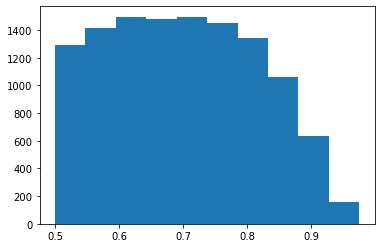

In [112]:
plt.hist(query.probability)

In [120]:
import numpy as np
np.median(query.probability)

0.6961670517921448

In [123]:
(np.array(query.probability)>0.9).sum()

462

(array([  12.,  419., 2710., 2223., 1738., 1634., 1415., 1007.,  503.,
         170.]),
 array([-0.17358913, -0.05804732,  0.05749449,  0.17303629,  0.2885781 ,
         0.4041199 ,  0.51966171,  0.63520351,  0.75074532,  0.86628712,
         0.98182893]),
 <BarContainer object of 10 artists>)

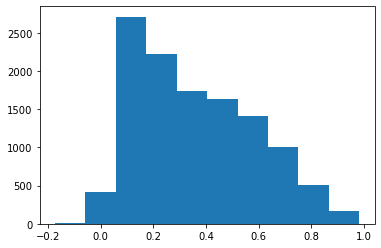

In [113]:
plt.hist(query.ppiu_score)